El Support Vector Classifier (SVC) es un algoritmo de aprendizaje supervisado basado en Support Vector Machines (SVM). Se usa principalmente para clasificación binaria y multiclase, buscando encontrar la mejor separación entre clases mediante un hiperplano óptimo.

.1. Hiperplano Óptimo
SVC intenta encontrar una línea (en 2D) o un hiperplano (en dimensiones mayores) que maximiza la separación entre las clases.

Separa los datos en distintas clases con la mayor distancia posible a los puntos más cercanos (llamados vectores de soporte).

La distancia entre este hiperplano y los vectores de soporte se llama margen.

Regla clave:
📌 Cuanto mayor sea el margen, mejor será la generalización del modelo.

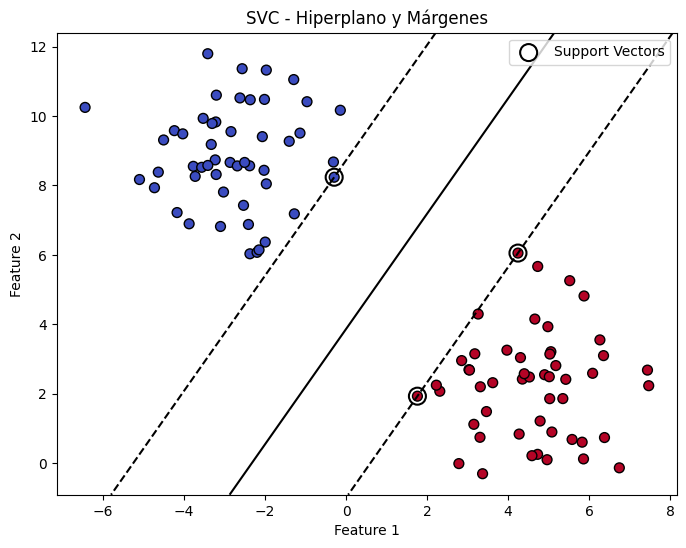

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

# 1. Generar datos simulados
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.5)

# 2. Crear y entrenar el modelo SVC
svc = SVC(kernel="linear", C=1.0)
svc.fit(X, y)

# 3. Función para visualizar la clasificación y el hiperplano
def plot_decision_boundary(model, X, y):
    plt.figure(figsize=(8, 6))
    
    # Graficar puntos
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", s=50, edgecolors="k")
    
    # Crear una malla para graficar la región de decisión
    xlim = plt.xlim()
    ylim = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                         np.linspace(ylim[0], ylim[1], 100))
    
    # Predecir clases para cada punto de la malla
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Dibujar la frontera de decisión y los márgenes
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=["dashed", "solid", "dashed"], colors="black")
    
    # Dibujar los vectores de soporte
    sv = model.support_vectors_
    plt.scatter(sv[:, 0], sv[:, 1], s=150, facecolors="none", edgecolors="black", linewidths=1.5, label="Support Vectors")
    
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("SVC - Hiperplano y Márgenes")
    plt.legend()
    plt.show()

# 4. Llamar a la función de visualización
plot_decision_boundary(svc, X, y)

SVC Lineal 📏

Si los datos son linealmente separables, se usa una función lineal para clasificar.

Usa la función de pérdida Hinge Loss para penalizar puntos mal clasificados.

SVC con Kernel 🌌

Cuando los datos no son linealmente separables, se usan funciones de transformación llamadas kernels.

Estos transforman los datos a un espacio de mayor dimensión donde sí son separables.

📌 Ejemplos de kernels:

linear: Mantiene los datos en su espacio original.

poly: Transforma los datos a un espacio polinómico.

rbf (Radial Basis Function): Usa una función gaussiana para modelar relaciones no lineales.

sigmoid: Usa una función sigmoide, útil en ciertos problemas.


3. Parámetro "C" y Regularización 🏋️
El hiperparámetro C controla el equilibrio entre maximizar el margen y minimizar errores de clasificación.

C grande → Menos margen, menos errores, pero puede sobreajustar.

C pequeño → Mayor margen, más errores, pero mejor generalización.